#Problem Statement:

#1.Understand which factors influence the revenue generated by the customers.

#2.Predict the revenue "Amount" for a given customer is likely to generate.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data Reading

In [2]:
data=pd.read_csv("RetailCustomerRevenue.csv")

In [3]:
data.head()

,PersonID,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode,Area,Occupation
0,C1104,3125,2,6,261,11,9,365,11,2,Area1,2
1,C1111,5298,2,5,323,9,9,218,3,2,Area1,1
2,C1117,4375,2,6,355,11,11,1367,11,2,Area1,2
3,C1128,9700,5,7,418,51,41,2947,51,1,Area1,1
4,C1132,3625,2,7,290,9,9,1233,8,2,Area1,3


In [4]:
data.dtypes

PersonID                 object
Amount                    int64
FamilySize                int64
Distance                  int64
Duration                  int64
DirectVisits              int64
OnlineVisits              int64
Quantity                  int64
NumberofFrequentItems     int64
TransactionMode           int64
Area                     object
Occupation                int64
dtype: object

In [5]:
data.describe()

,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode,Occupation
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,4209.432267,3.116065,7.353642,349.146698,16.283186,14.745405,1600.154527,14.780463,1.821647,2.045950
std,2069.917106,1.038815,2.989459,89.621938,8.494674,7.310646,1920.046598,8.822916,0.382874,0.818329
min,2500.000000,2.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,2897.250000,2.000000,6.000000,305.000000,11.000000,10.000000,444.000000,10.000000,2.000000,1.000000
50%,3512.000000,3.000000,7.000000,368.000000,14.000000,13.000000,1028.500000,13.000000,2.000000,2.000000
75%,4772.500000,4.000000,8.000000,418.000000,19.000000,17.000000,2047.250000,19.000000,2.000000,3.000000
max,24764.000000,12.000000,23.000000,472.000000,119.000000,112.000000,27829.000000,115.000000,2.000000,3.000000


In [6]:
print(data.shape)
print(data.PersonID.nunique())

(2938, 12)
2938


# DATA TYPE CONVERSION

In [7]:
ins=[]
for col in data.columns:
  if data[col].nunique()<10:
    ins.append(col)
    data[col]=data[col].astype('category')
    print(col,data[col].nunique())
    print(data[col].unique())


TransactionMode 2
[2, 1]
Categories (2, int64): [2, 1]
Area 2
[Area1, Area2]
Categories (2, object): [Area1, Area2]
Occupation 3
[2, 1, 3]
Categories (3, int64): [2, 1, 3]


In [8]:
data.dtypes

PersonID                   object
Amount                      int64
FamilySize                  int64
Distance                    int64
Duration                    int64
DirectVisits                int64
OnlineVisits                int64
Quantity                    int64
NumberofFrequentItems       int64
TransactionMode          category
Area                     category
Occupation               category
dtype: object

In [9]:
data['FamilySize'].unique()

array([ 2,  5,  3,  4,  6,  8,  7, 10, 12,  9])

In [10]:
data.isna().sum()

PersonID                 0
Amount                   0
FamilySize               0
Distance                 0
Duration                 0
DirectVisits             0
OnlineVisits             0
Quantity                 0
NumberofFrequentItems    0
TransactionMode          0
Area                     0
Occupation               0
dtype: int64

CORRELATION BETWEEN NUMERIC ATTRIBUTE

In [11]:
num_attr=data.select_dtypes(include=['int64','float64']).columns
num_attr

Index(['Amount', 'FamilySize', 'Distance', 'Duration', 'DirectVisits',
       'OnlineVisits', 'Quantity', 'NumberofFrequentItems'],
      dtype='object')

# Correlation between attributes

In [12]:
data[num_attr].corr()

,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems
Amount,1.000000,0.101605,-0.000649,0.122863,0.661911,0.751496,0.239952,0.496008
FamilySize,0.101605,1.000000,0.436628,0.081646,0.131551,0.127229,0.167357,0.125670
Distance,-0.000649,0.436628,1.000000,-0.057219,-0.004709,-0.012891,-0.002030,-0.010339
Duration,0.122863,0.081646,-0.057219,1.000000,0.207336,0.196975,0.230608,0.200766
DirectVisits,0.661911,0.131551,-0.004709,0.207336,1.000000,0.934496,0.298580,0.949014
OnlineVisits,0.751496,0.127229,-0.012891,0.196975,0.934496,1.000000,0.321901,0.869229
Quantity,0.239952,0.167357,-0.002030,0.230608,0.298580,0.321901,1.000000,0.302033
NumberofFrequentItems,0.496008,0.125670,-0.010339,0.200766,0.949014,0.869229,0.302033,1.000000


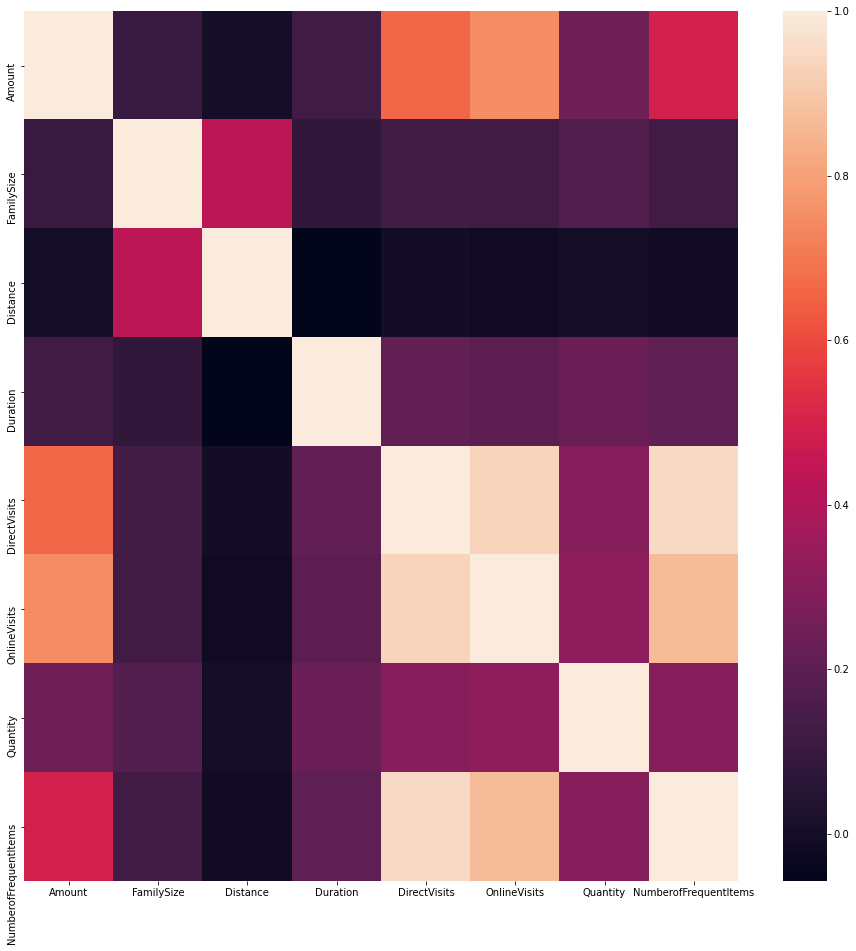

In [13]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr())
plt.show()

From the above heat map we can say that 'DirectVisits & NumberofFrequentItems' and 'DirectVisits & OnlineVisits' are more correlated than *others*

# Data Analysis and Visualizations

In [14]:
data['Occupation'].value_counts()

3    1054
2     965
1     919
Name: Occupation, dtype: int64

<BarContainer object of 3 artists>

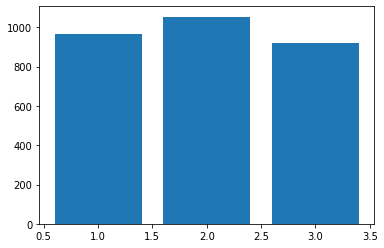

In [15]:
plt.bar(data['Occupation'].unique(),data['Occupation'].value_counts())

<function matplotlib.pyplot.show>

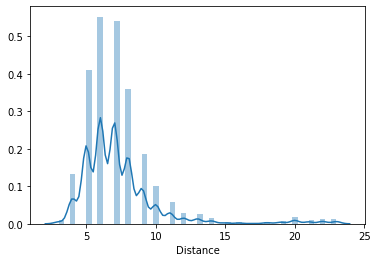

In [16]:
sns.distplot(data['Distance'])
plt.show

<function matplotlib.pyplot.show>

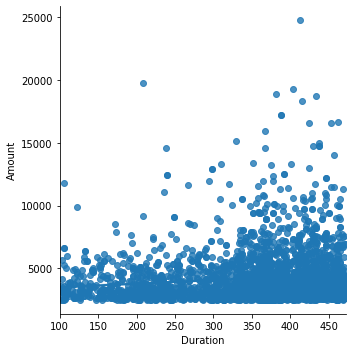

In [17]:
sns.lmplot(x='Duration',y='Amount',data=data)
plt.show

<function matplotlib.pyplot.show>

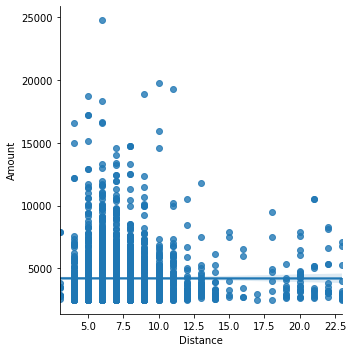

In [18]:
sns.lmplot(x='Distance',y='Amount',data=data)
plt.show

<function matplotlib.pyplot.show>

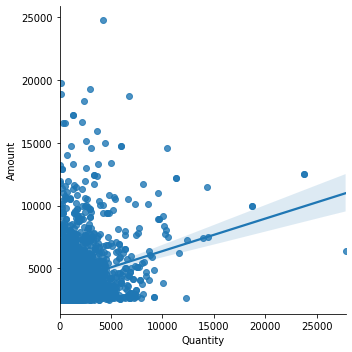

In [19]:
sns.lmplot(x='Quantity',y='Amount',data=data)
plt.show

<function matplotlib.pyplot.show>

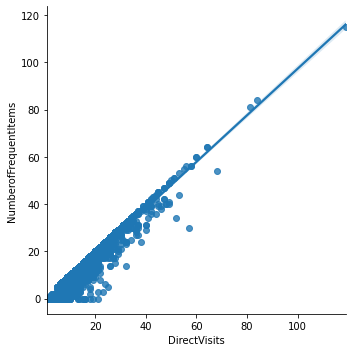

In [20]:
sns.lmplot(x='DirectVisits',y='NumberofFrequentItems',data=data)
plt.show

## **Splitting** **Data**

In [21]:
x=data.iloc[:,2:]
print(x.shape)
x.head()

(2938, 10)


,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode,Area,Occupation
0,2,6,261,11,9,365,11,2,Area1,2
1,2,5,323,9,9,218,3,2,Area1,1
2,2,6,355,11,11,1367,11,2,Area1,2
3,5,7,418,51,41,2947,51,1,Area1,1
4,2,7,290,9,9,1233,8,2,Area1,3


In [22]:
y=data.Amount
y.head()

0    3125
1    5298
2    4375
3    9700
4    3625
Name: Amount, dtype: int64

In [23]:
x1=pd.get_dummies(x)
print(x1.shape)
x1.head()

(2938, 14)


,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode_1,TransactionMode_2,Area_Area1,Area_Area2,Occupation_1,Occupation_2,Occupation_3
0,2,6,261,11,9,365,11,0,1,1,0,0,1,0
1,2,5,323,9,9,218,3,0,1,1,0,1,0,0
2,2,6,355,11,11,1367,11,0,1,1,0,0,1,0
3,5,7,418,51,41,2947,51,1,0,1,0,1,0,0
4,2,7,290,9,9,1233,8,0,1,1,0,0,0,1


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,random_state=110)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2350, 14)
(588, 14)
(2350,)
(588,)


# Building linear Model using sklearn

In [26]:
from sklearn.metrics import mean_squared_error,r2_score

In [27]:
model=LinearRegression()
lin_model=model.fit(x_train,y_train)
pred=lin_model.predict(x_train)

In [28]:
print(y_train.shape)
pred.shape

(2350,)


(2350,)

In [29]:

print(mean_squared_error(y_train,pred))
r2_score(y_train,pred)

1262850.53608787


0.7219464457706011

In [30]:
test_pred=lin_model.predict(x_test)
print(mean_squared_error(y_test,test_pred))
r2_score(y_test,test_pred)

1022667.3064468036


0.6842391894471578

# Building Linear Model using OLS 

In [31]:
data.head()

,PersonID,Amount,FamilySize,Distance,Duration,DirectVisits,OnlineVisits,Quantity,NumberofFrequentItems,TransactionMode,Area,Occupation
0,C1104,3125,2,6,261,11,9,365,11,2,Area1,2
1,C1111,5298,2,5,323,9,9,218,3,2,Area1,1
2,C1117,4375,2,6,355,11,11,1367,11,2,Area1,2
3,C1128,9700,5,7,418,51,41,2947,51,1,Area1,1
4,C1132,3625,2,7,290,9,9,1233,8,2,Area1,3


In [32]:
data.shape

(2938, 12)

In [33]:
print(data.columns)
x.columns

Index(['PersonID', 'Amount', 'FamilySize', 'Distance', 'Duration',
       'DirectVisits', 'OnlineVisits', 'Quantity', 'NumberofFrequentItems',
       'TransactionMode', 'Area', 'Occupation'],
      dtype='object')


Index(['FamilySize', 'Distance', 'Duration', 'DirectVisits', 'OnlineVisits',
       'Quantity', 'NumberofFrequentItems', 'TransactionMode', 'Area',
       'Occupation'],
      dtype='object')

In [34]:
#creating the formula
ind='+'.join(x.columns)
ind

'FamilySize+Distance+Duration+DirectVisits+OnlineVisits+Quantity+NumberofFrequentItems+TransactionMode+Area+Occupation'

In [35]:
formula='~'.join(('Amount',ind))
formula

'Amount~FamilySize+Distance+Duration+DirectVisits+OnlineVisits+Quantity+NumberofFrequentItems+TransactionMode+Area+Occupation'

In [36]:
lm_mod=ols(formula=formula,data=data)
ols_mod=lm_mod.fit()

In [37]:
print(ols_mod.summary2())

                      Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.716     
Dependent Variable:    Amount              AIC:                   49518.8936
Date:                  2020-07-15 10:40    BIC:                   49590.7194
No. Observations:      2938                Log-Likelihood:        -24747.   
Df Model:              11                  F-statistic:           673.3     
Df Residuals:          2926                Prob (F-statistic):    0.00      
R-squared:             0.717               Scale:                 1.2179e+06
----------------------------------------------------------------------------
                        Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
----------------------------------------------------------------------------
Intercept              621.3437 120.6836   5.1485 0.0000  384.7103  857.9771
TransactionMode[T.2]   299.4014  55.5814   5.3867 0.0000  190.4188  408.3841
Area[T.Area2]         

As we can see that it states that our has strong multicollinearity or other numerical problems. lets try reduce them.

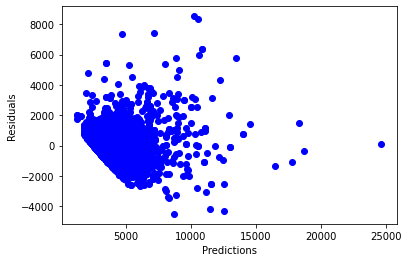

In [38]:
preds_tr=ols_mod.predict(exog=data)
plt.figure()
plt.plot(preds_tr,ols_mod.resid,'bo')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show(block=True)

note:Influence combines the leverage and residual of a case to measure how the parameter estimates would change if that case were excluded

<Figure size 432x288 with 0 Axes>

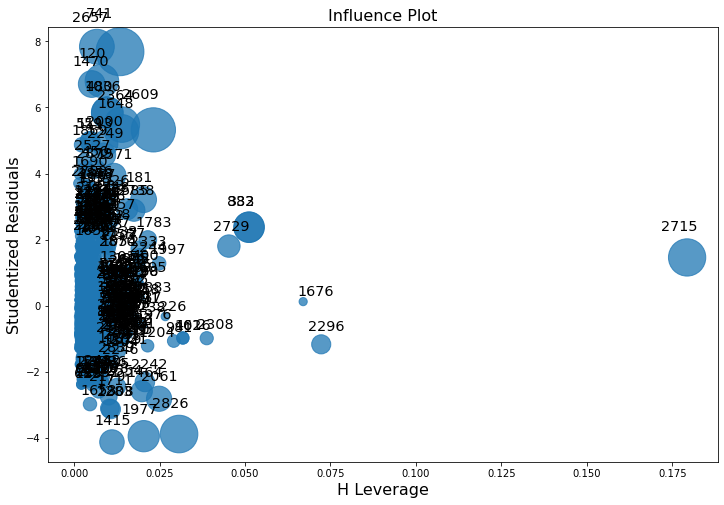

In [39]:
plt.figure()
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(ols_mod, alpha  = 0.05, ax = ax, criterion="cooks")
plt.show(block=True)

In [40]:
#leverage is a measure of how far away the independent variable values of an observation are from those of the other observations.
# remove high leverage values
subset = ~data.index.isin(["2715", "2609","2657","741","2826"])
lm_model2 = ols(formula, data=data, subset=subset).fit()
print(lm_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     656.8
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        10:40:42   Log-Likelihood:                -24622.
No. Observations:                2933   AIC:                         4.927e+04
Df Residuals:                    2921   BIC:                         4.934e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               722.00

Again it is showing that there are
strong multicollinearity or other numerical problems. Now let us check Vif values



In [41]:
num_attr = data.select_dtypes(include=['int64', 'float64']).columns
num_attr

Index(['Amount', 'FamilySize', 'Distance', 'Duration', 'DirectVisits',
       'OnlineVisits', 'Quantity', 'NumberofFrequentItems'],
      dtype='object')

In [42]:
#Lets use variance inflation factor (VIF) to understand if there exist a multicollinearity and remove those attributes
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xdata=data[num_attr]
Xdata['intercept']=1
Xdata=Xdata[['FamilySize', 'Distance', 'Duration', 'DirectVisits','OnlineVisits', 'Quantity', 'NumberofFrequentItems']]
vif=pd.DataFrame()
vif['Vif']=[variance_inflation_factor(Xdata.values,i) for i in range(Xdata.shape[1])]
vif['Variables']=Xdata.columns.values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
vif

,Vif,Variables
0,11.785637,FamilySize
1,7.967553,Distance
2,9.319592,Duration
3,93.786223,DirectVisits
4,41.235767,OnlineVisits
5,1.972035,Quantity
6,39.435133,NumberofFrequentItems


As VIF for DirectVisits is higher lets drop the column and see the result

In [44]:
lm_mod3=ols(formula,data=data,drop_cols=['DirectVisits'],subset=subset)
result3 = lm_mod3.fit()
print(result3.summary2())

                      Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.659     
Dependent Variable:    Amount              AIC:                   49752.2456
Date:                  2020-07-15 10:40    BIC:                   49818.0672
No. Observations:      2933                Log-Likelihood:        -24865.   
Df Model:              10                  F-statistic:           567.8     
Df Residuals:          2922                Prob (F-statistic):    0.00      
R-squared:             0.660               Scale:                 1.3577e+06
----------------------------------------------------------------------------
                        Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
----------------------------------------------------------------------------
Intercept             1013.1093 127.0897   7.9716 0.0000  763.9149 1262.3037
TransactionMode[T.2]     2.9841  57.3791   0.0520 0.9585 -109.5236  115.4917
Area[T.Area2]         

Lets Split the data into train and test and build ols model

In [45]:
traindata,testdata = train_test_split(data,test_size=.20,random_state=110)

In [46]:
mod_lm = ols(formula=formula, data=traindata) # Describe model
res = mod_lm.fit()                           # Fit model
print(res.summary2())  

                      Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.721     
Dependent Variable:    Amount              AIC:                   39707.8839
Date:                  2020-07-15 10:40    BIC:                   39777.0300
No. Observations:      2350                Log-Likelihood:        -19842.   
Df Model:              11                  F-statistic:           551.9     
Df Residuals:          2338                Prob (F-statistic):    0.00      
R-squared:             0.722               Scale:                 1.2693e+06
----------------------------------------------------------------------------
                        Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
----------------------------------------------------------------------------
Intercept              609.0907 135.8949   4.4821 0.0000  342.6036  875.5778
TransactionMode[T.2]   303.8097  62.9276   4.8279 0.0000  180.4099  427.2094
Area[T.Area2]         

In [47]:
ind_atr=x.columns
ind_atr


Index(['FamilySize', 'Distance', 'Duration', 'DirectVisits', 'OnlineVisits',
       'Quantity', 'NumberofFrequentItems', 'TransactionMode', 'Area',
       'Occupation'],
      dtype='object')

## Error Metrics

In [48]:
train=traindata[ind_atr]
pred_train=res.predict(train)
MAE=np.mean(abs(np.array(traindata['Amount'])-np.array(pred_train)))
print("The Mean Absolute Error on train data is: ",MAE)

test=testdata[ind_atr]
pred_test=res.predict(test)
MAE=np.mean(abs(np.array(testdata['Amount'])-np.array(pred_test)))
print("The Mean Absolute Error on test data is: ",MAE)

The Mean Absolute Error on train data is:  794.4186494384851
The Mean Absolute Error on test data is:  780.9985911033475


As we can see there is no Big Difference in MAE of traindata and test data

In [49]:
#To compute mean absolute percentage error
MAPE=np.mean(abs((np.array(testdata['Amount'])-np.array(pred_test))/np.array(testdata['Amount'])))
print("The Mean Absolute Percentage Error on test data is: ",MAPE*100)

The Mean Absolute Percentage Error on test data is:  19.670127387633688


In [50]:
#To compute Root mean squared error

RMSE=np.sqrt(np.mean((np.array(traindata['Amount'])-np.array(pred_train))**2))

print("The Root Mean Square Error on train data is: ",RMSE)

RMSE=np.sqrt(np.mean((np.array(testdata['Amount'])-np.array(pred_test))**2))

print("The Root Mean Square Error on test data is: ",RMSE)

The Root Mean Square Error on train data is:  1123.7662283980019
The Root Mean Square Error on test data is:  1011.2701451376888


So when we can see the difference in RMSE for train and test data

In [51]:
# To compute mean squared error

MSE=np.mean((np.array(testdata['Amount'])-np.array(pred_test))**2)
print("The Mean Square Error on test data is: ",MSE)

The Mean Square Error on test data is:  1022667.3064468022


## Let us try building a model on train data removing high vif values

In [52]:
lm_mod4=ols(formula,data=traindata,drop_cols=['DirectVisits'])
result4 = lm_mod4.fit()
print(result4.summary2())

                      Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.669     
Dependent Variable:    Amount              AIC:                   40105.0531
Date:                  2020-07-15 10:40    BIC:                   40168.4370
No. Observations:      2350                Log-Likelihood:        -20042.   
Df Model:              10                  F-statistic:           475.9     
Df Residuals:          2339                Prob (F-statistic):    0.00      
R-squared:             0.670               Scale:                 1.5037e+06
----------------------------------------------------------------------------
                        Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
----------------------------------------------------------------------------
Intercept              854.3867 147.3513   5.7983 0.0000  565.4339 1143.3396
TransactionMode[T.2]    48.1033  67.1718   0.7161 0.4740  -83.6192  179.8258
Area[T.Area2]         

Error Metrics using ols model

In [53]:
train=traindata[ind_atr]
pred_train=result4.predict(train)
MAE=np.mean(abs(np.array(traindata['Amount'])-np.array(pred_train)))
print("The Mean Absolute Error on train data is: ",MAE)


test=testdata[ind_atr]
pred_test=result4.predict(test)
MAE=np.mean(abs(np.array(testdata['Amount'])-np.array(pred_test)))
print("The Mean Absolute Error on test data is: ",MAE)

The Mean Absolute Error on train data is:  864.3448393992561
The Mean Absolute Error on test data is:  834.8601782383163


In [54]:
RMSE=np.sqrt(np.mean((np.array(traindata['Amount'])-np.array(pred_train))**2))

print("The Root Mean Square Error on train data is: ",RMSE)


RMSE=np.sqrt(np.mean((np.array(testdata['Amount'])-np.array(pred_test))**2))

print("The Root Mean Square Error on test data is: ",RMSE)


The Root Mean Square Error on train data is:  1223.3773637780826
The Root Mean Square Error on test data is:  1080.0039794786346


error metric values using sklearn linear model

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [56]:
train_pred=lin_model.predict(x_train)
print("The Root Mean Square Error on train data is: ",np.sqrt(mean_squared_error(y_train,train_pred)))

test_pred=lin_model.predict(x_test)
print("The Root Mean Square Error on test data is: ",np.sqrt(mean_squared_error(y_test,test_pred)))

The Root Mean Square Error on train data is:  1123.7662283980019
The Root Mean Square Error on test data is:  1011.2701451376895


In [57]:
train_pred=lin_model.predict(x_train)
print("The Mean Absolute Error on train data is: ",mean_absolute_error(y_train,train_pred))

test_pred=lin_model.predict(x_test)
print("The Mean Absolute Error on test data is: ",mean_absolute_error(y_test,test_pred))


The Mean Absolute Error on train data is:  794.4186494384907
The Mean Absolute Error on test data is:  780.9985911033568


### We can observe that there is less difference between error metrics for train and test data in sklearn linear model than ols model. 